In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Perform EDA

In [ ]:
# check null values
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
# check duplicates
data.duplicated().sum()

np.int64(2)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

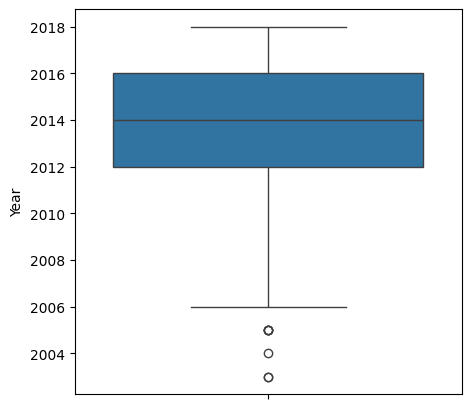

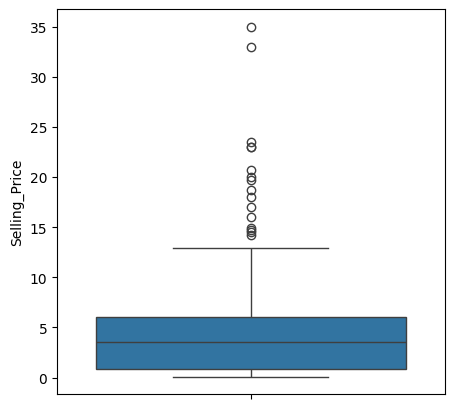

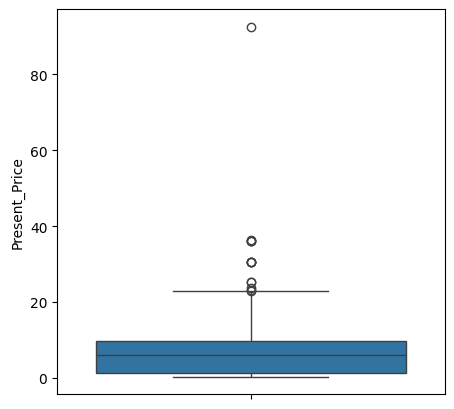

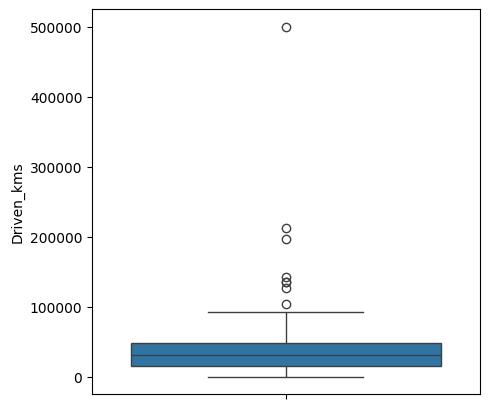

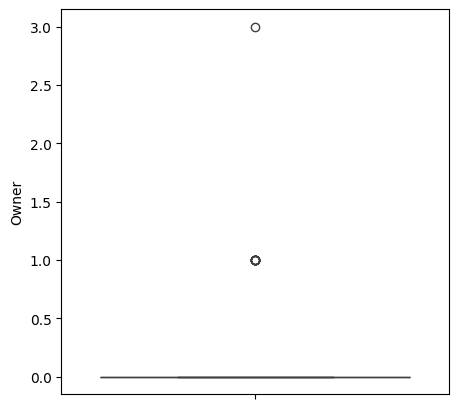

In [ ]:
# outlier analysis
for col in data.columns:
  if data[col].dtype!='object':
    plt.figure(figsize=(5,5))
    sns.boxplot(data[col])
    plt.show()

In [ ]:
# remove outliers
outliers=['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
for col in outliers:
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  data=data[(data[col]>lower) & (data[col]<upper)]

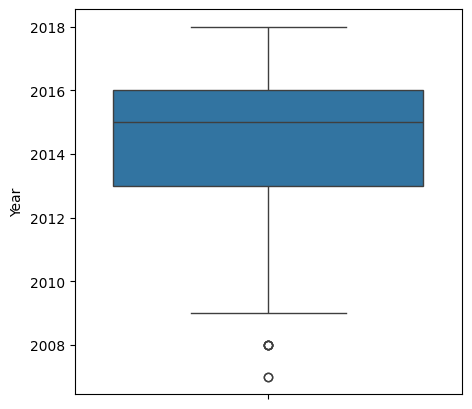

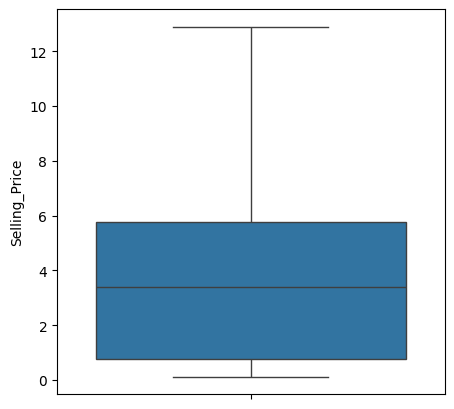

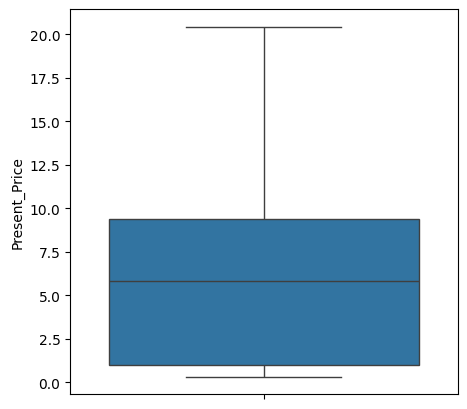

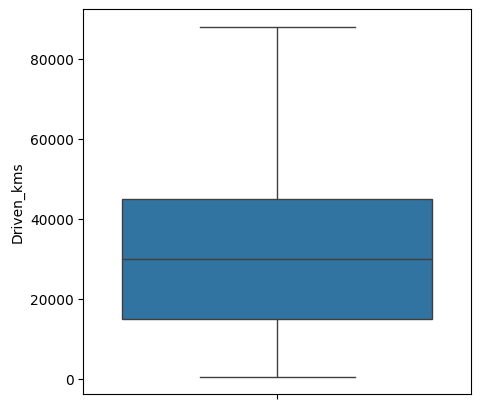

In [ ]:
for col in outliers:
  plt.figure(figsize=(5,5))
  sns.boxplot(data[col])
  plt.show()

In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
# Label Encoding
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# cols=['Fuel_Type','Selling_type','Transmission']
# for col in cols:
#   data[col]=le.fit_transform(data[col])

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.info() #data is clean now

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       268 non-null    object 
 1   Year           268 non-null    int64  
 2   Selling_Price  268 non-null    float64
 3   Present_Price  268 non-null    float64
 4   Driven_kms     268 non-null    int64  
 5   Fuel_Type      268 non-null    object 
 6   Selling_type   268 non-null    object 
 7   Transmission   268 non-null    object 
 8   Owner          268 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 20.9+ KB


Perform Machine learning

In [ ]:
data = data.drop('Car_Name', axis=1)

# Separate X and y
x = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# One-hot encode categorical features
x = pd.get_dummies(x, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=1)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
print("MAE :",mean_absolute_error(y_test,prediction))
print("R2 Score :",r2_score(y_test,prediction))

MAE : 0.72879568088699
R2 Score : 0.8676896144620372


In [ ]:
sample_data = pd.DataFrame([{
    'Year': 2018,
    'Present_Price': 7.5,
    'Driven_kms': 30000,
    'Owner': 0,
    'Fuel_Type_Diesel': 0,
    'Fuel_Type_Petrol': 1,
    'Selling_type_Individual': 1,
    'Transmission_Manual': 1
}])
pred=model.predict(sample_data)
print("Predicted Selling Price:", pred[0].round(2))

Predicted Selling Price: 4.51
